In [1]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Position CSV/RB_stacked.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Ameer Abdullah,13,58,3.586207,Career,0.0,0.0,0.0,0.0,0.0,...,48.0,NaN,195.0,5278.0,6.0,NaN,0.0,NaN,NaN,NaN
1,Josh Adams,3,17,2.823529,Career,NaN,0.0,NaN,NaN,NaN,...,23.0,NaN,212.0,2823.0,4.5,NaN,0.0,NaN,NaN,NaN
2,Joseph Addai,54,78,11.076923,NaN,NaN,1.0,NaN,NaN,NaN,...,24.0,NaN,NaN,3217.0,5.8,NaN,0.0,NaN,NaN,Career
3,Jay Ajayi,20,45,7.111111,Career,NaN,0.0,NaN,0.0,0.0,...,55.0,NaN,216.0,4567.0,6.1,NaN,0.0,NaN,NaN,NaN
4,Shaun Alexander,79,123,10.276423,NaN,0.0,NaN,0.0,NaN,NaN,...,50.0,NaN,NaN,4363.0,5.5,NaN,NaN,NaN,NaN,Career


In [3]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [4]:
df.fillna(0, inplace=True)

In [5]:
for col in df.columns: 
    print(col) 

AVp16
adjusted_yards_per_attempt
assists_on_tackles
completed_passes
extra_points_made
field_goals_made
fumbles_forced
fumbles_recovered
fumbles_recovered_for_touchdown
games.y
interceptions
interceptions_returned_for_touchdown
interceptions_thrown
kickoff_return_touchdowns
other_touchdowns
pass_attempts
passes_defended
passing_completion
passing_touchdowns
passing_yards
passing_yards_per_attempt
plays_from_scrimmage
points
punt_return_touchdowns
quarterback_rating
receiving_touchdowns
receiving_yards
receiving_yards_per_reception
receptions
rush_attempts
rush_touchdowns
rush_yards
rush_yards_per_attempt
rushing_and_receiving_touchdowns
sacks
safeties
solo_tackles
tackles_for_loss
total_tackles
total_touchdowns
two_point_conversions
weight
yards_from_scrimmage
yards_from_scrimmage_per_play
yards_recovered_from_fumble
yards_returned_from_interceptions
yards_returned_per_interception


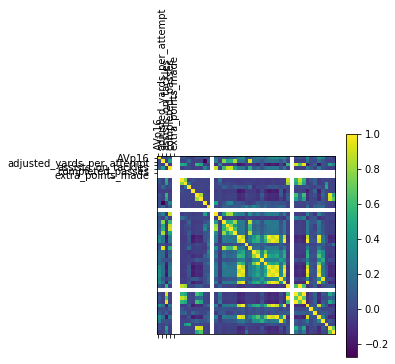

In [6]:
plt.matshow(df.corr())
plt.xticks(np.arange(5), df.columns, rotation=90)
plt.yticks(np.arange(5), df.columns, rotation=0)
plt.colorbar()
plt.show()

#from IPython.display import Image
#img=plt.to_image(format="png")
#Image(img)

In [7]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['adjusted_yards_per_attempt', 'assists_on_tackles', 'completed_passes', 'extra_points_made', 'field_goals_made', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'interceptions', 'interceptions_returned_for_touchdown', 'interceptions_thrown', 'kickoff_return_touchdowns', 'other_touchdowns', 'pass_attempts', 'passes_defended', 'passing_completion', 'passing_touchdowns', 'passing_yards', 'passing_yards_per_attempt', 'plays_from_scrimmage', 'points', 'punt_return_touchdowns', 'quarterback_rating', 'receiving_touchdowns', 'receiving_yards', 'receiving_yards_per_reception', 'receptions', 'rush_attempts', 'rush_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'rushing_and_receiving_touchdowns', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss', 'total_tackles', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.03393007620558519
Weights:  [-5.41056715e-02  9.15657215e-02  1.09298946e+00 -1.89069593e-12
 -3.00520719e-12  4.30626774e-01 -4.91230146e-01  1.87896036e-01
  1.84531129e+00 -2.90003599e+00 -9.42832833e-01  3.16625773e-01
  1.55342406e-12  3.57556424e-01  1.38730872e+00 -2.72188200e-03
 -1.45293553e+00 -5.45621070e-02  1.82395123e-01 -1.62063229e-02
 -1.50040685e-02 -3.90588053e-01 -3.12313662e-03 -1.83054914e-01
  1.16031168e-03  1.45512069e-02 -1.61123147e-02 -9.40082386e-05
  1.28547933e-01  1.30392641e-03 -2.77395623e-01 -5.45069803e-02
  8.40785690e-01  2.22044605e-16 -1.18319193e-01 -4.73474902e-02
 -2.67534717e-02  3.93677699e-02 -1.25605344e-01  2.46423809e-03
  3.22854348e-01  0.00000000e+00 -2.85452452e-02 -4.70317086e-02]


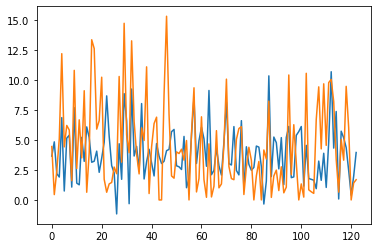

In [8]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['quarterback_rating', 'passing_yards', 'interceptions_returned_for_touchdown', 'total_touchdowns', 'points']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.033076034523374154
Weights:  [-1.62664612e-03  1.32863632e-02 -2.97704363e+00  1.02352102e+00
 -1.57493907e-01]


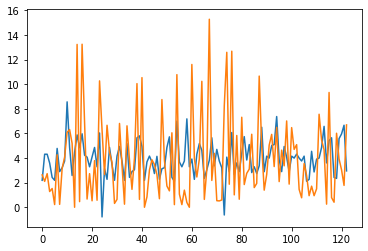

In [10]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.053623587488457636
Weights:  [-1.62506025e-03  1.32740728e-02 -1.97965063e+00  5.72919261e-01
 -8.23799816e-02]


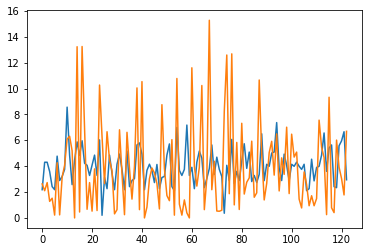

In [11]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [12]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
0.07048305310666965
[-1.46085108e-03  1.11812001e-02  2.07492463e+00 -2.90222251e-01
  6.09976299e-02]

Ridge Regression
0.0859660341116982
[-1.50103235e-03  1.11805304e-02  1.71005311e+00  2.15200595e-01
 -2.32882318e-02]
